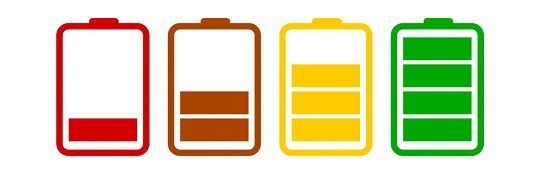

image from https://sac0800fone.com/aplicacoes-que-facilitam-a-sua-vida-e-ajuda-na-bateria/

# Introduction

Remaining useful life (RUL) is the amount of time a machine or an asset is likely to operate before it requires repair or replacement. Depending on your system, this time period can be represented in number of Days, Miles, Cycles or any other quantity. RUL prediction provides early warnings of failure and has become a key component in the prognostics and health management of systems. It allows engineers to schedule maintenance, optimize operating efficiency and avoid unplanned downtime.

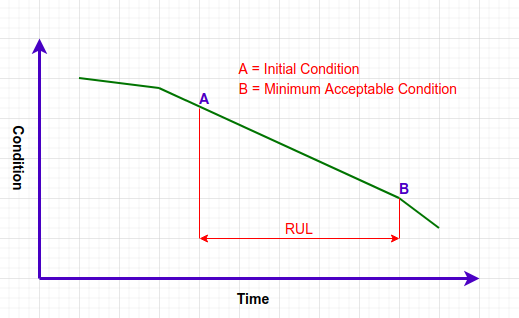

This image shows the deterioration of a machine over time. If A is the current condition and B is the minimum acceptable condition beyond which the machine will fail, Remaining Useful Life is computed as the time between these two points. If RUL is estimated in advance, maintenance or replacement can be carried out to avoid unplanned downtime and economic losses. Since the prediction of RUL is critical to operations and decision making, it is important to estimate it accurately.

reference: 'Remaining Useful Life (RUL) Prediction'( https://www.stratada.com/remaining-useful-life-rul-prediction/ )

# Importing and data outline

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

In [4]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [7]:
numlist=df.columns

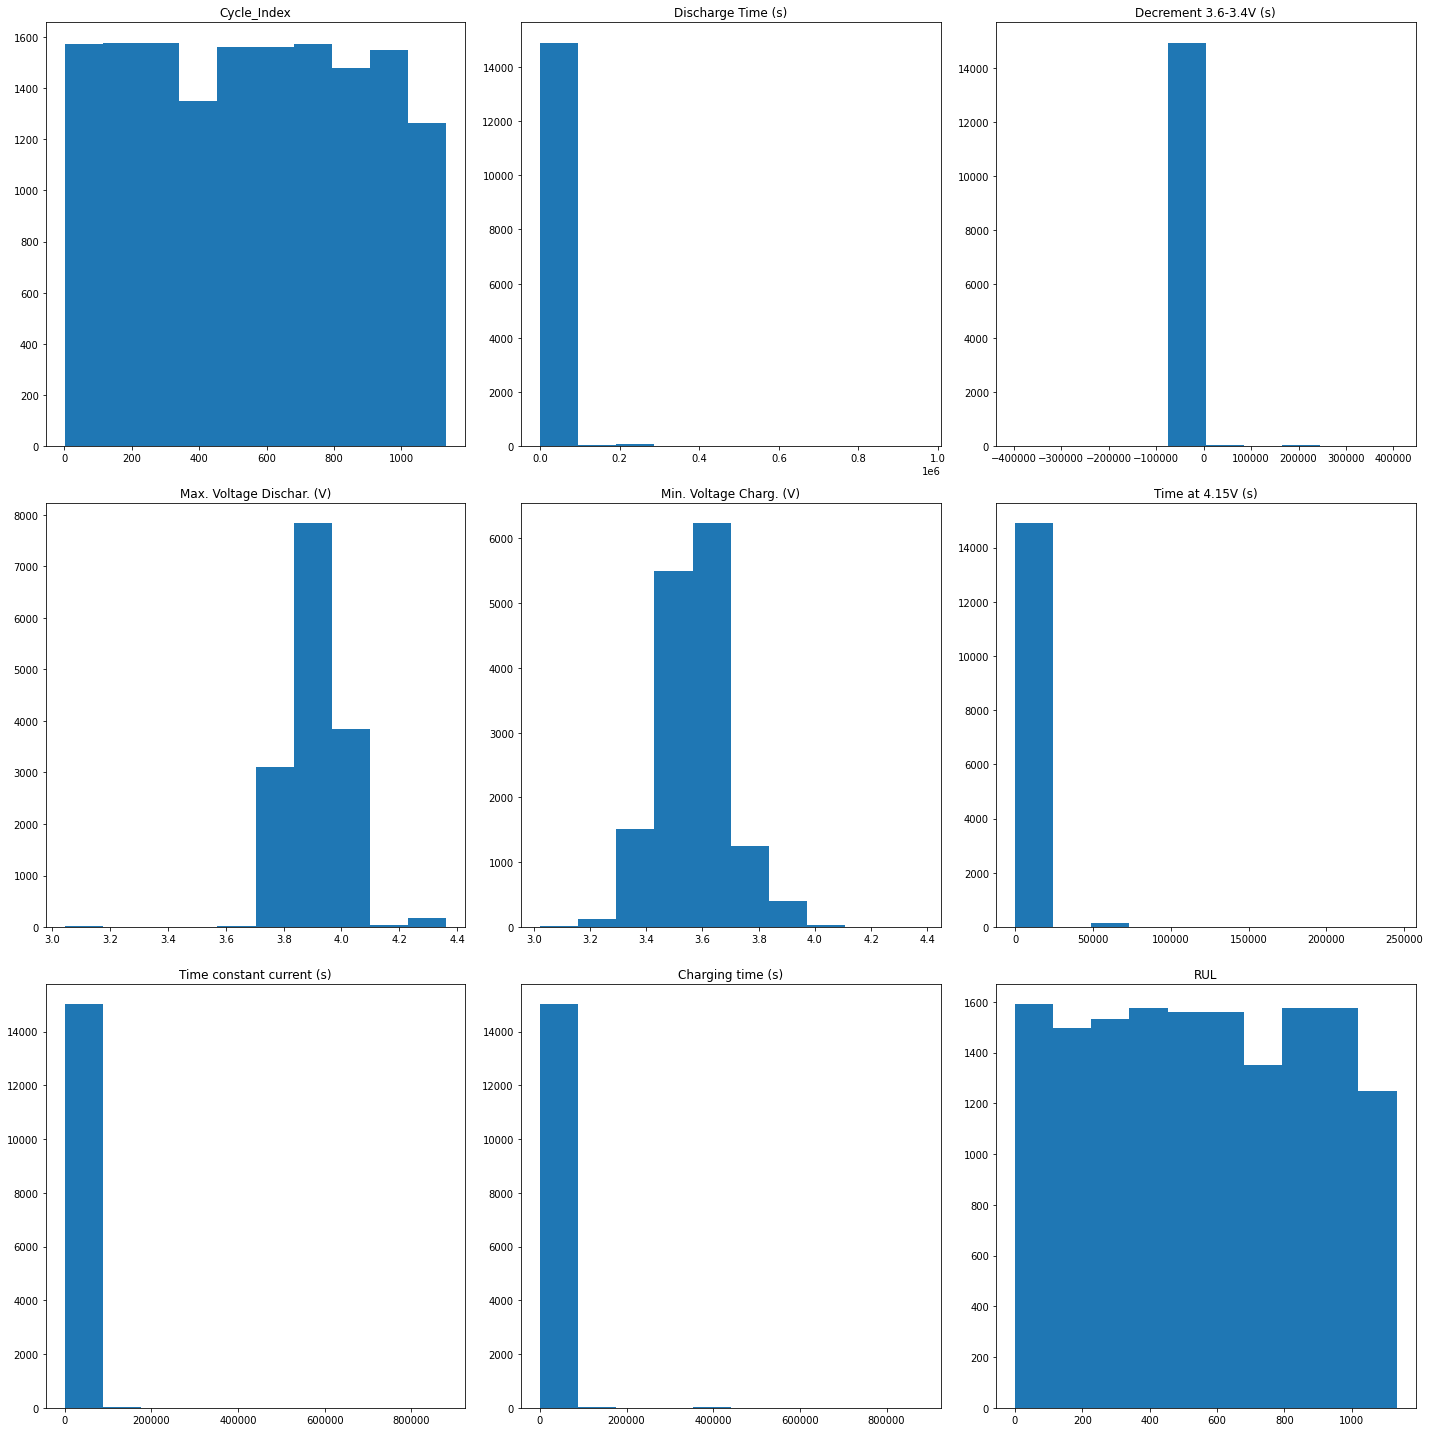

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(len(numlist)):
    plt.subplot(3,3,i+1)
    plt.title(numlist[i],fontsize=12)
    plt.hist(df[numlist[i]])

plt.tight_layout()

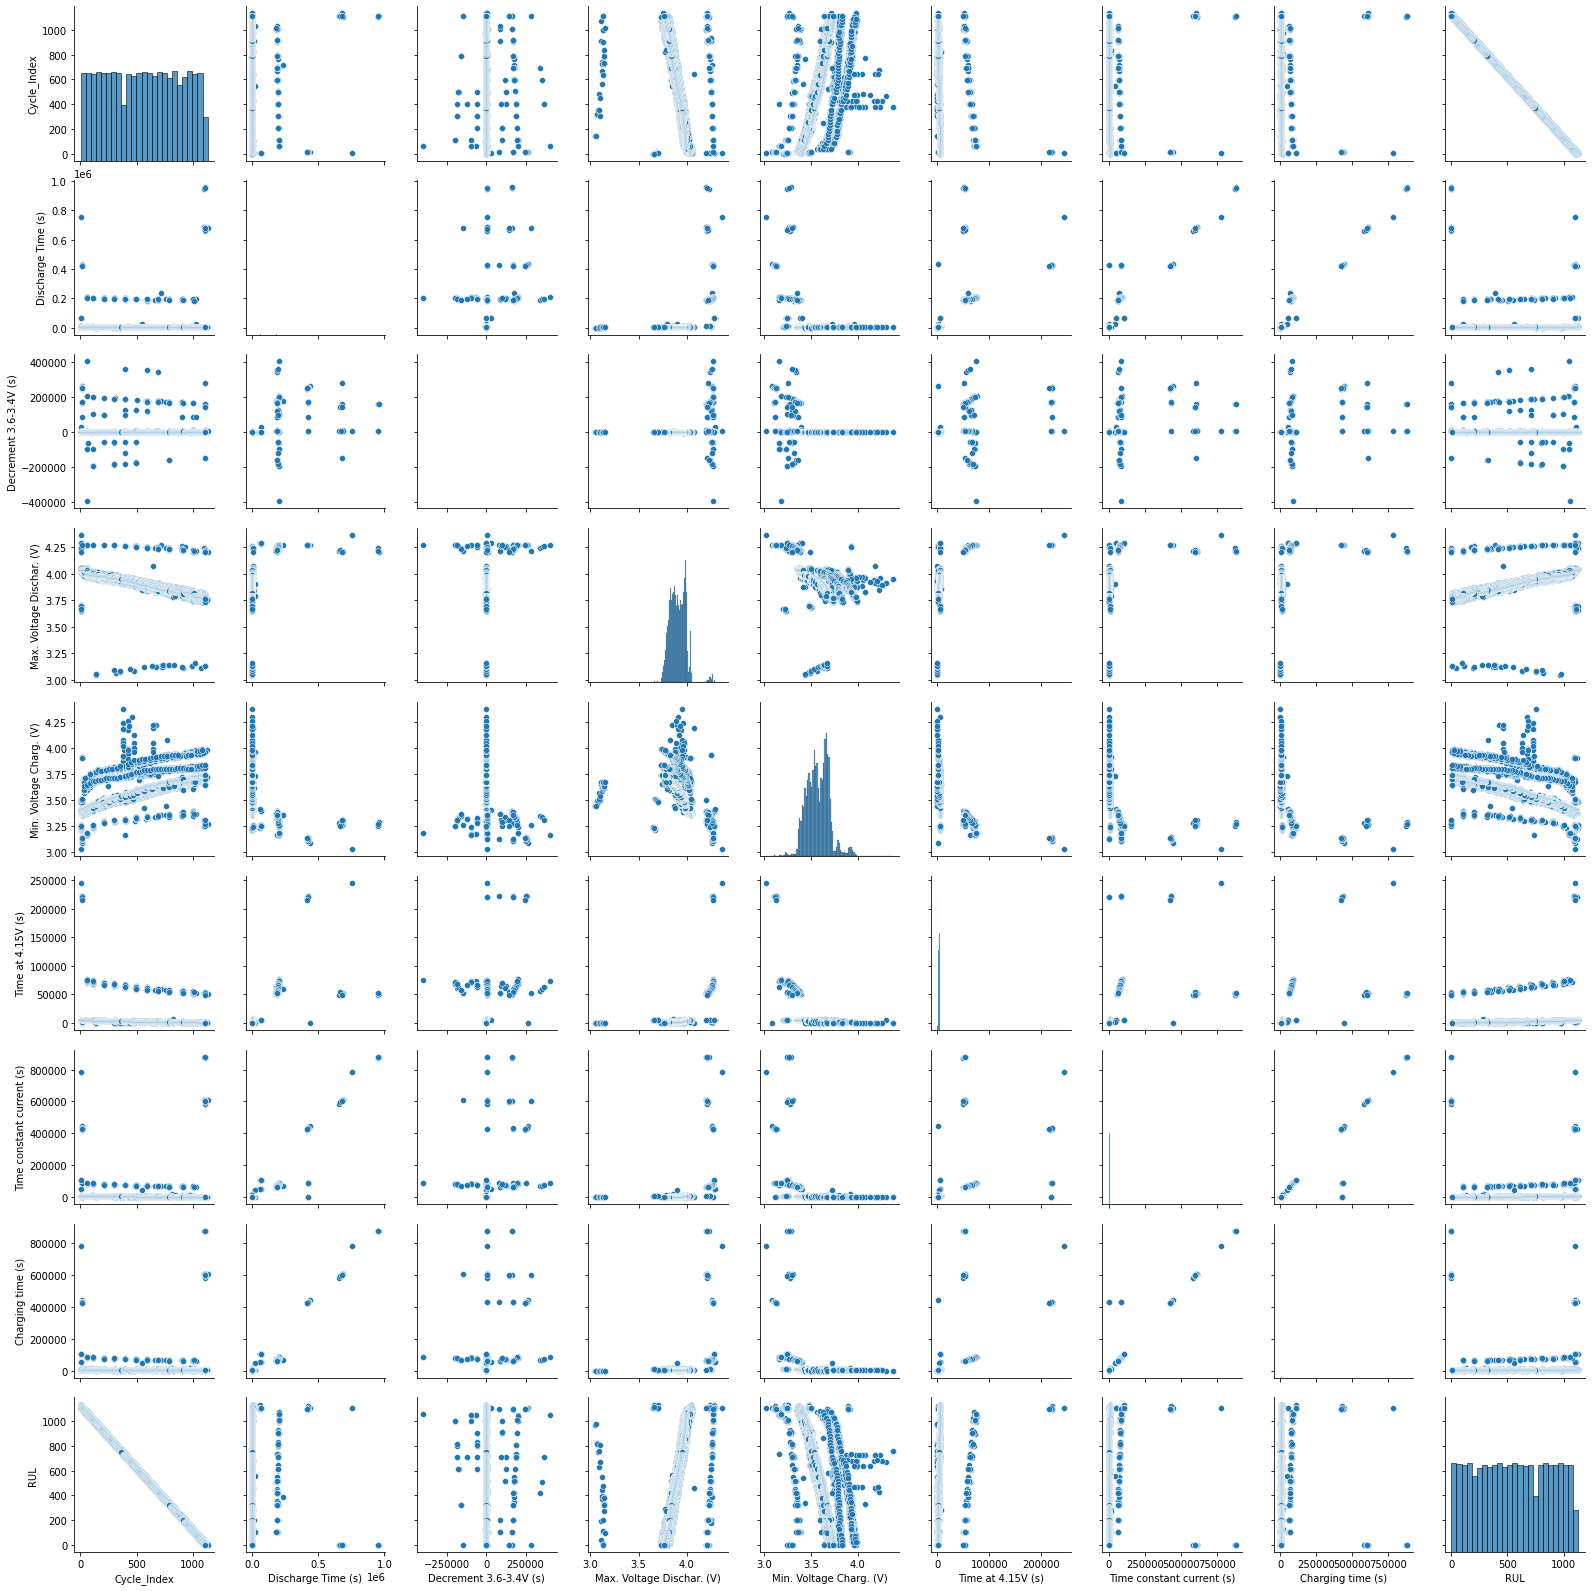

In [9]:
sns.pairplot(df)

# Correlation among features

<AxesSubplot:>

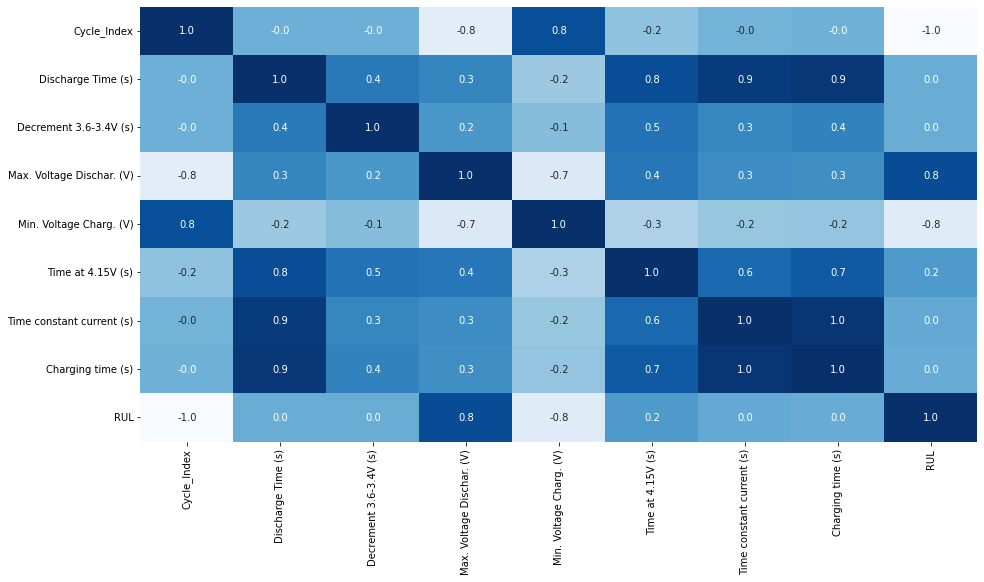

In [10]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

Correlation between RUL and
* Max. Voltage Dischar. (V) is 0.8
* Min. Voltage Charg. (V) is -0.8
* Time at 4.15V (s) is 0.2
* Cycle index is -1.0
* Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s)　are 0. And correlation between Time at 4.15V and these four features are 0.8, 0.5,0.6 and 0.7.

So I drop Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s). And I drop 'Cycle_Index' from features because it may cause leakage.

In [11]:
df1=df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'],axis=1)

# Prediction Model

In [12]:
pip install pycaret --ignore-installed llvmlite numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 31.3 MB/s et

In [13]:
pip install numba --upgrade

  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires gensim<4.0.0, but you have gensim 4.0.1 which is incompatible.
pycaret 2.3.10 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.9.0 which is incompatible.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.55.2 which is incompatible.
pycaret 2.3.10 requires pyyaml<6.0.0, but you have pyyaml 6.0 which is incompatible.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
pycaret 2.3.10 requires spa

In [14]:
conda install -c numba llvmlite

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - llvmlite


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py37h89c1867_0         155 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    llvmlite-0.38.0            |   py37he1b5a44_0        28.2 MB  numba
    openssl-1.1.1p             |       h166bdaf_0         2.1 MB  conda-forge
    -----------------------------------------------------------

In [15]:
from pycaret.regression import *

In [16]:
exp_reg = setup(df1, target = 'RUL',silent=True,session_id=1)

,Description,Value
0,session_id,1
1,Target,RUL
2,Original Data,"(15064, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10544, 3)"


In [17]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,14.3974,973.1120,30.8631,0.9906,0.2467,0.1622,0.7090
rf,Random Forest Regressor,16.0495,1077.2664,32.6200,0.9896,0.2419,0.1656,1.1350
xgboost,Extreme Gradient Boosting,22.0938,1378.2664,36.8676,0.9867,0.2802,0.2134,0.3550
catboost,CatBoost Regressor,25.1925,1583.9220,39.5092,0.9847,0.3055,0.2367,2.0920
lightgbm,Light Gradient Boosting Machine,27.5884,1659.6889,40.6332,0.9840,0.3273,0.2639,0.1510
dt,Decision Tree Regressor,17.4280,1900.5009,43.2262,0.9817,0.2955,0.1888,0.0260
gbr,Gradient Boosting Regressor,35.6539,2456.6430,49.4168,0.9764,0.3926,0.3474,0.3380
knn,K Neighbors Regressor,42.5484,4463.5665,66.7556,0.9571,0.4297,0.4081,0.0410
ada,AdaBoost Regressor,64.0910,5795.2248,76.0617,0.9442,0.5519,0.7953,0.1900
ridge,Ridge Regression,107.7786,27522.7721,165.2463,0.7354,0.6973,0.9539,0.0140


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1, verbose=0, warm_start=False)

In [18]:
reg_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.4928,880.1018,29.6665,0.9914,0.3187,0.2511
1,13.7230,803.5686,28.3473,0.9922,0.2686,0.1326
2,14.7050,1855.0395,43.0702,0.9822,0.2215,0.1152
3,13.9914,1127.0873,33.5721,0.9894,0.2365,0.1209
4,14.2464,886.5512,29.7750,0.9910,0.2303,0.1698
5,15.3467,900.3882,30.0065,0.9914,0.2728,0.2331
6,16.3396,1023.3138,31.9893,0.9903,0.2772,0.2561
7,13.3255,775.3381,27.8449,0.9927,0.2314,0.1377
8,13.7815,682.2909,26.1207,0.9934,0.2045,0.0998


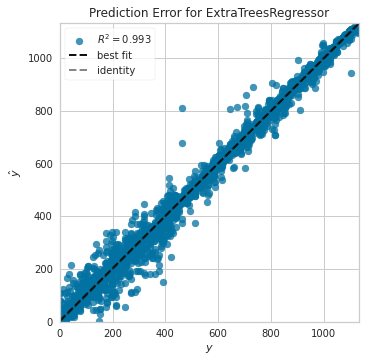

In [19]:
plot_model(reg_model,plot='error')

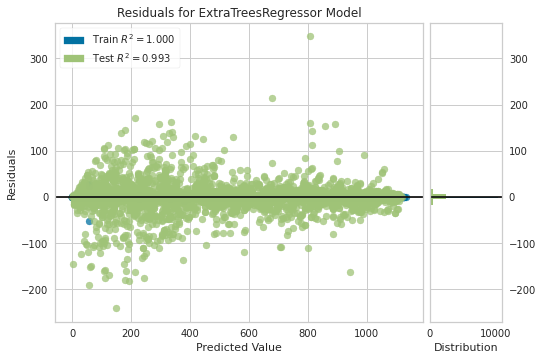

In [20]:
plot_model(reg_model,plot='residuals')

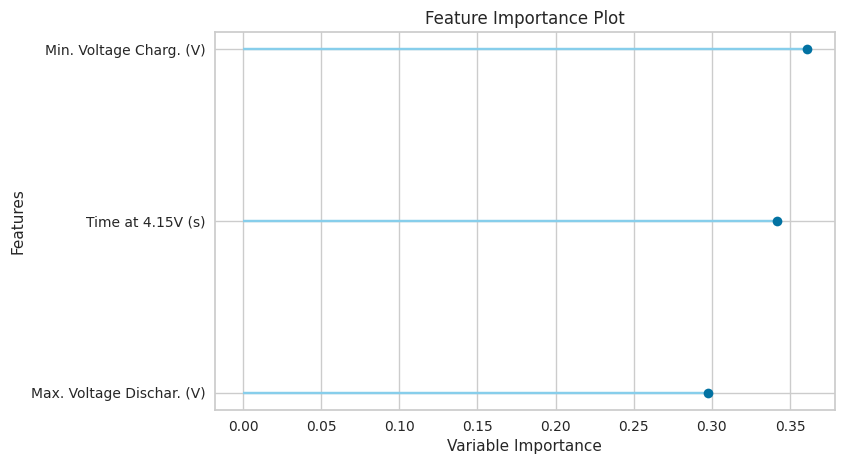

In [21]:
plot_model(reg_model,plot='feature')

# Additional Try - Blending

In [22]:
xgb = create_model('xgboost',verbose=False)
rf = create_model('rf', verbose = False)

In [23]:
blend_specific = blend_models(estimator_list = [rf,xgb,reg_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.9455,933.5730,30.5544,0.9909,0.3187,0.2664
1,15.8387,877.5107,29.6228,0.9914,0.2664,0.1353
2,17.4635,1654.3546,40.6738,0.9841,0.2224,0.1247
3,16.6233,1299.6365,36.0505,0.9878,0.2391,0.1366
4,17.0711,1037.9739,32.2176,0.9895,0.2365,0.1853
5,17.9891,957.7253,30.9471,0.9909,0.2797,0.2578
6,19.2398,1281.2230,35.7942,0.9879,0.2789,0.2823
7,15.8157,815.1581,28.5510,0.9923,0.2445,0.1623
8,15.9456,737.3008,27.1533,0.9929,0.1989,0.1023


It is not better than 'reg_model'.

Thank you !